## Libs

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import phik
from phik.report import plot_correlation_matrix
from phik import report

import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

## Preliminary EDA

### Dataset description

- Age: age of the patient [years]

- Sex: sex of the patient [M: Male, F: Female]

- ChestPainType: chest pain type [TA: Typical $Angina^*$, ATA: Atypical $Angina^*$, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- RestingBP: resting blood pressure [mm Hg]

- Cholesterol: serum cholesterol [mm/dl]

- FastingBS: fasting blood sugar, this measures one's blood sugar after an overnight fast (not eating). [1: if FastingBS > 120 mg/dl, 0: otherwise] 

- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

- ExerciseAngina: exercise-induced angina,  [Y: Yes, N: No]

- Oldpeak: oldpeak = $ST^{**}$, $ST^{**}$ depression induced by exercise relative to rest [Numeric value measured in depression]

- ST_Slope: the slope of the peak exercise $ST^{**}$ segment [Up: upsloping, Flat: flat, Down: downsloping]

- HeartDisease: output class [1: heart disease, 0: Normal]


$^*$ Angina, a symptom of coronary artery disease. Angina also is called angina pectoris. Angina is often described as squeezing, pressure, heaviness, tightness or pain in the chest. Angina is pain in the chest that comes on with exercise, stress, or other things that make the heart work harder

$^{**}$ ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave.

In [2]:
df = pd.read_csv('heart.csv.xls')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Checking what data types do we have and if they need transforming, e.g. changing string to integer values if column name implies one

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

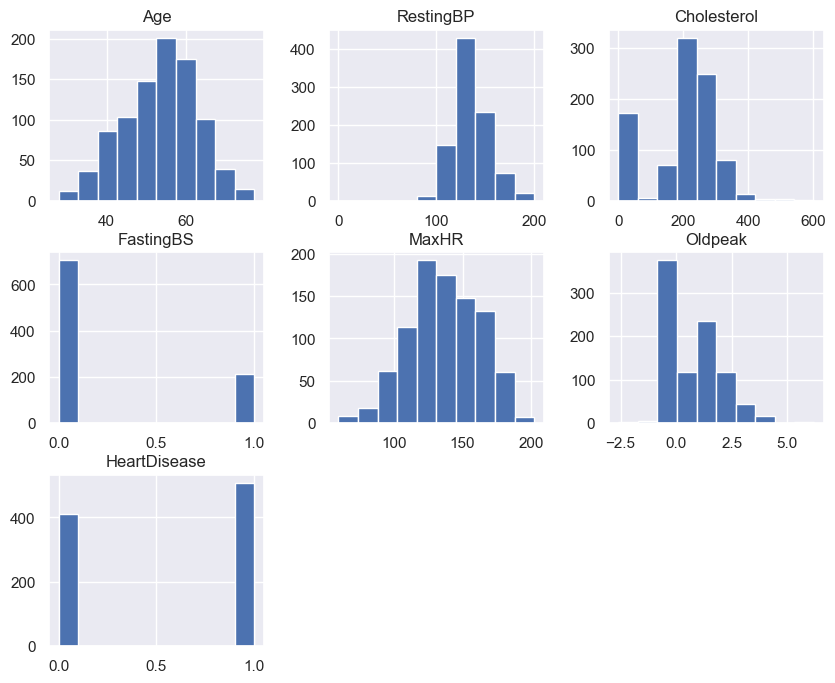

In [5]:
df.hist(figsize=(10, 8))

## Effect of features on heart disease status

### Correlation analysis

Linear correlation

In [6]:
corr = df._get_numeric_data().corr().round(2)
corr.style.background_gradient(cmap="RdYlGn")

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.250000,-0.100000,0.200000,-0.380000,0.260000,0.280000
RestingBP,0.250000,1.000000,0.100000,0.070000,-0.110000,0.160000,0.110000
Cholesterol,-0.100000,0.100000,1.000000,-0.260000,0.240000,0.050000,-0.230000
FastingBS,0.200000,0.070000,-0.260000,1.000000,-0.130000,0.050000,0.270000
MaxHR,-0.380000,-0.110000,0.240000,-0.130000,1.000000,-0.160000,-0.400000
Oldpeak,0.260000,0.160000,0.050000,0.050000,-0.160000,1.000000,0.400000
HeartDisease,0.280000,0.110000,-0.230000,0.270000,-0.400000,0.400000,1.000000


Phik correlation

interval columns not set, guessing: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


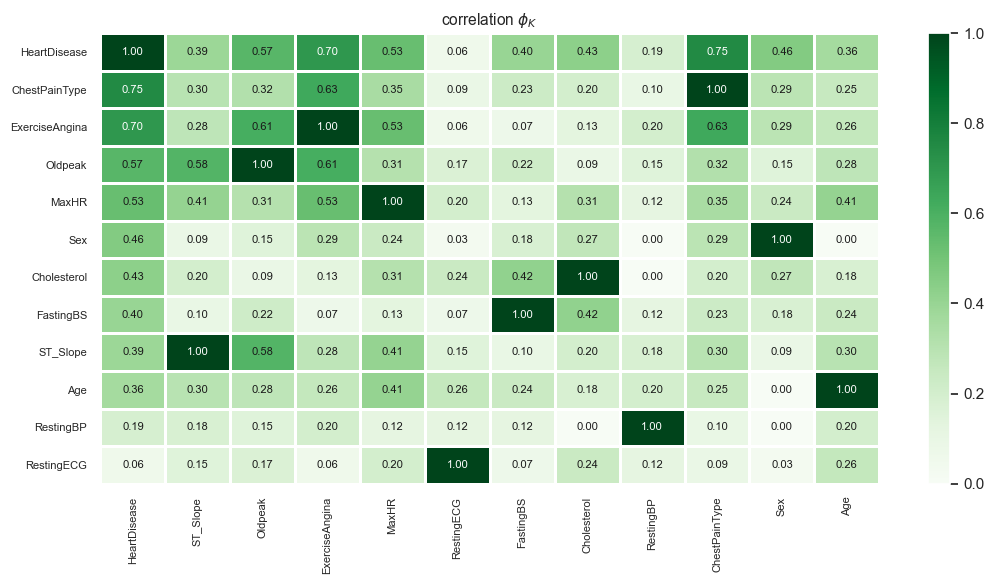

In [7]:
phik_overview = df.phik_matrix().round(2).sort_values('HeartDisease')

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

The features that correlate mostly with a target variable are pain type, excercise-induced angina, depression peak, maximal heart rate, gender and cholesterol.

### Pair-wise feature analysis

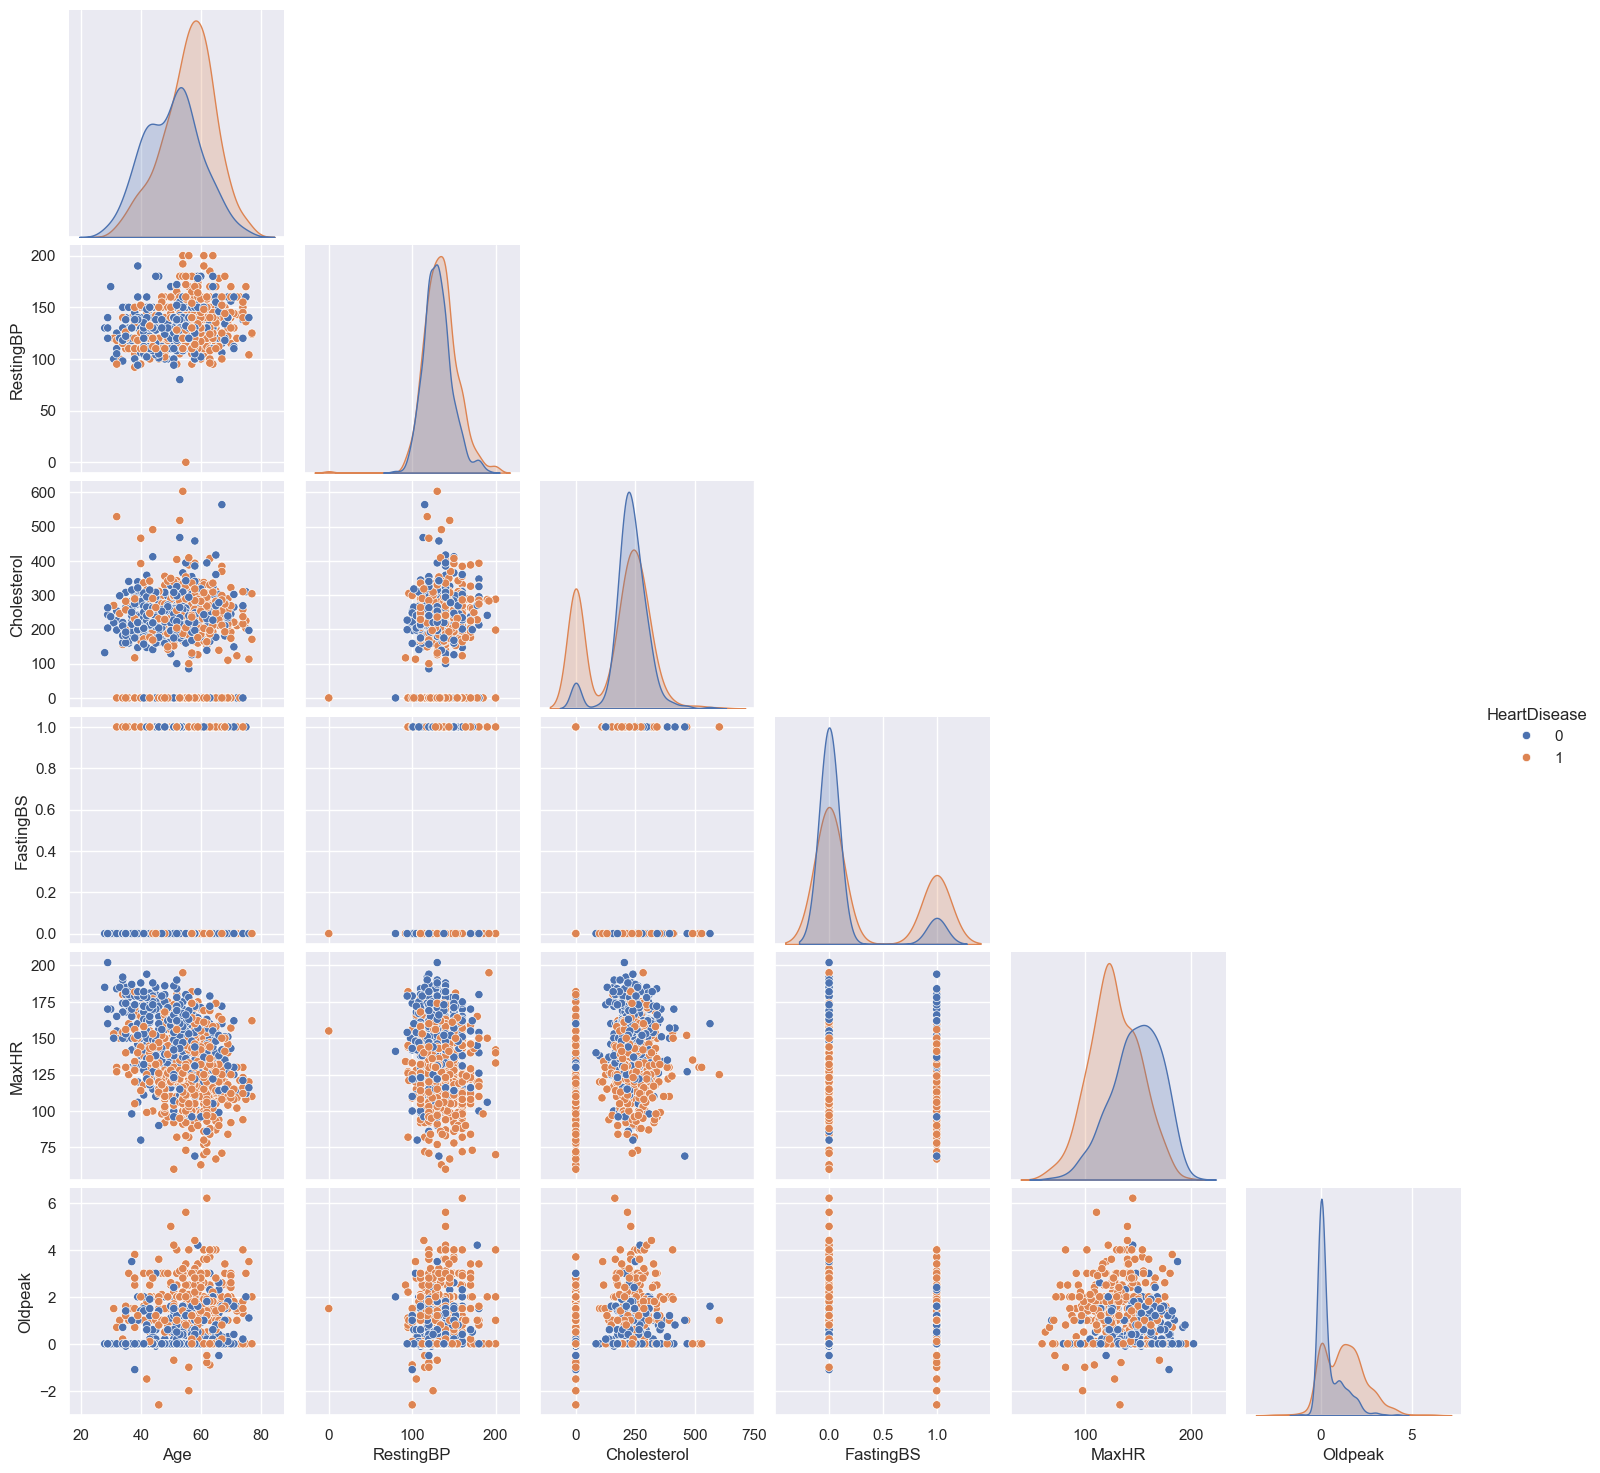

In [8]:
sns.pairplot(
    df,
    corner=True,
    hue="HeartDisease",

);

Some features have more pronounced differences in the distributions between healthy and diseased patients. 

### Missing values and outlier filtering

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing values in the dataset

<Axes: >

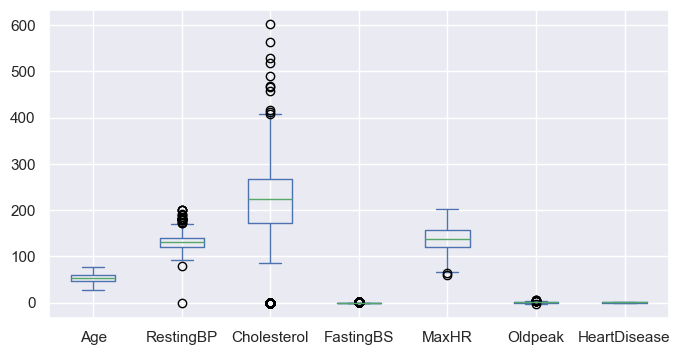

In [10]:
df.plot.box(figsize=(8, 4))

In [11]:
df.FastingBS.value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [12]:
def filter_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data[column] > lower_bound) & (data[column] < upper_bound)
    filtered_df = data[outlier_condition]
    
    return filtered_df

<Axes: >

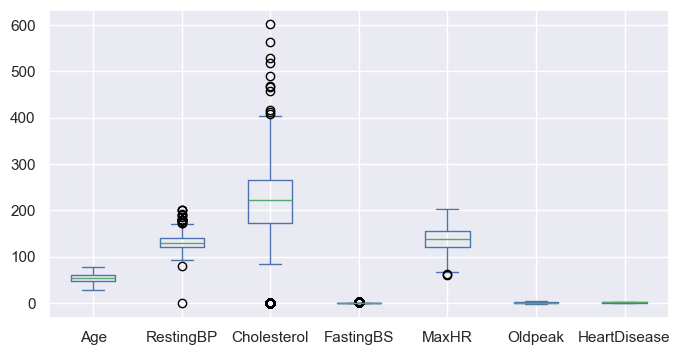

In [13]:
# df = filter_outliers(df, 'Cholesterol')
filter_outliers(df, 'Oldpeak').plot.box(figsize=(8, 4))

I decided not to filter numerical outliers as in context of heart disease they bring important information about patients' condition. 

Moreover, features with outliers are highly associated with the condition of interest.

## Data scaling

In [14]:
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

scaler.fit(df[num_features])
transformed_scaled = scaler.transform(df[num_features])

normalizer = Normalizer(norm='l2')
norm_transformed_scaled = normalizer.fit_transform(transformed_scaled)
df[num_features] = norm_transformed_scaled

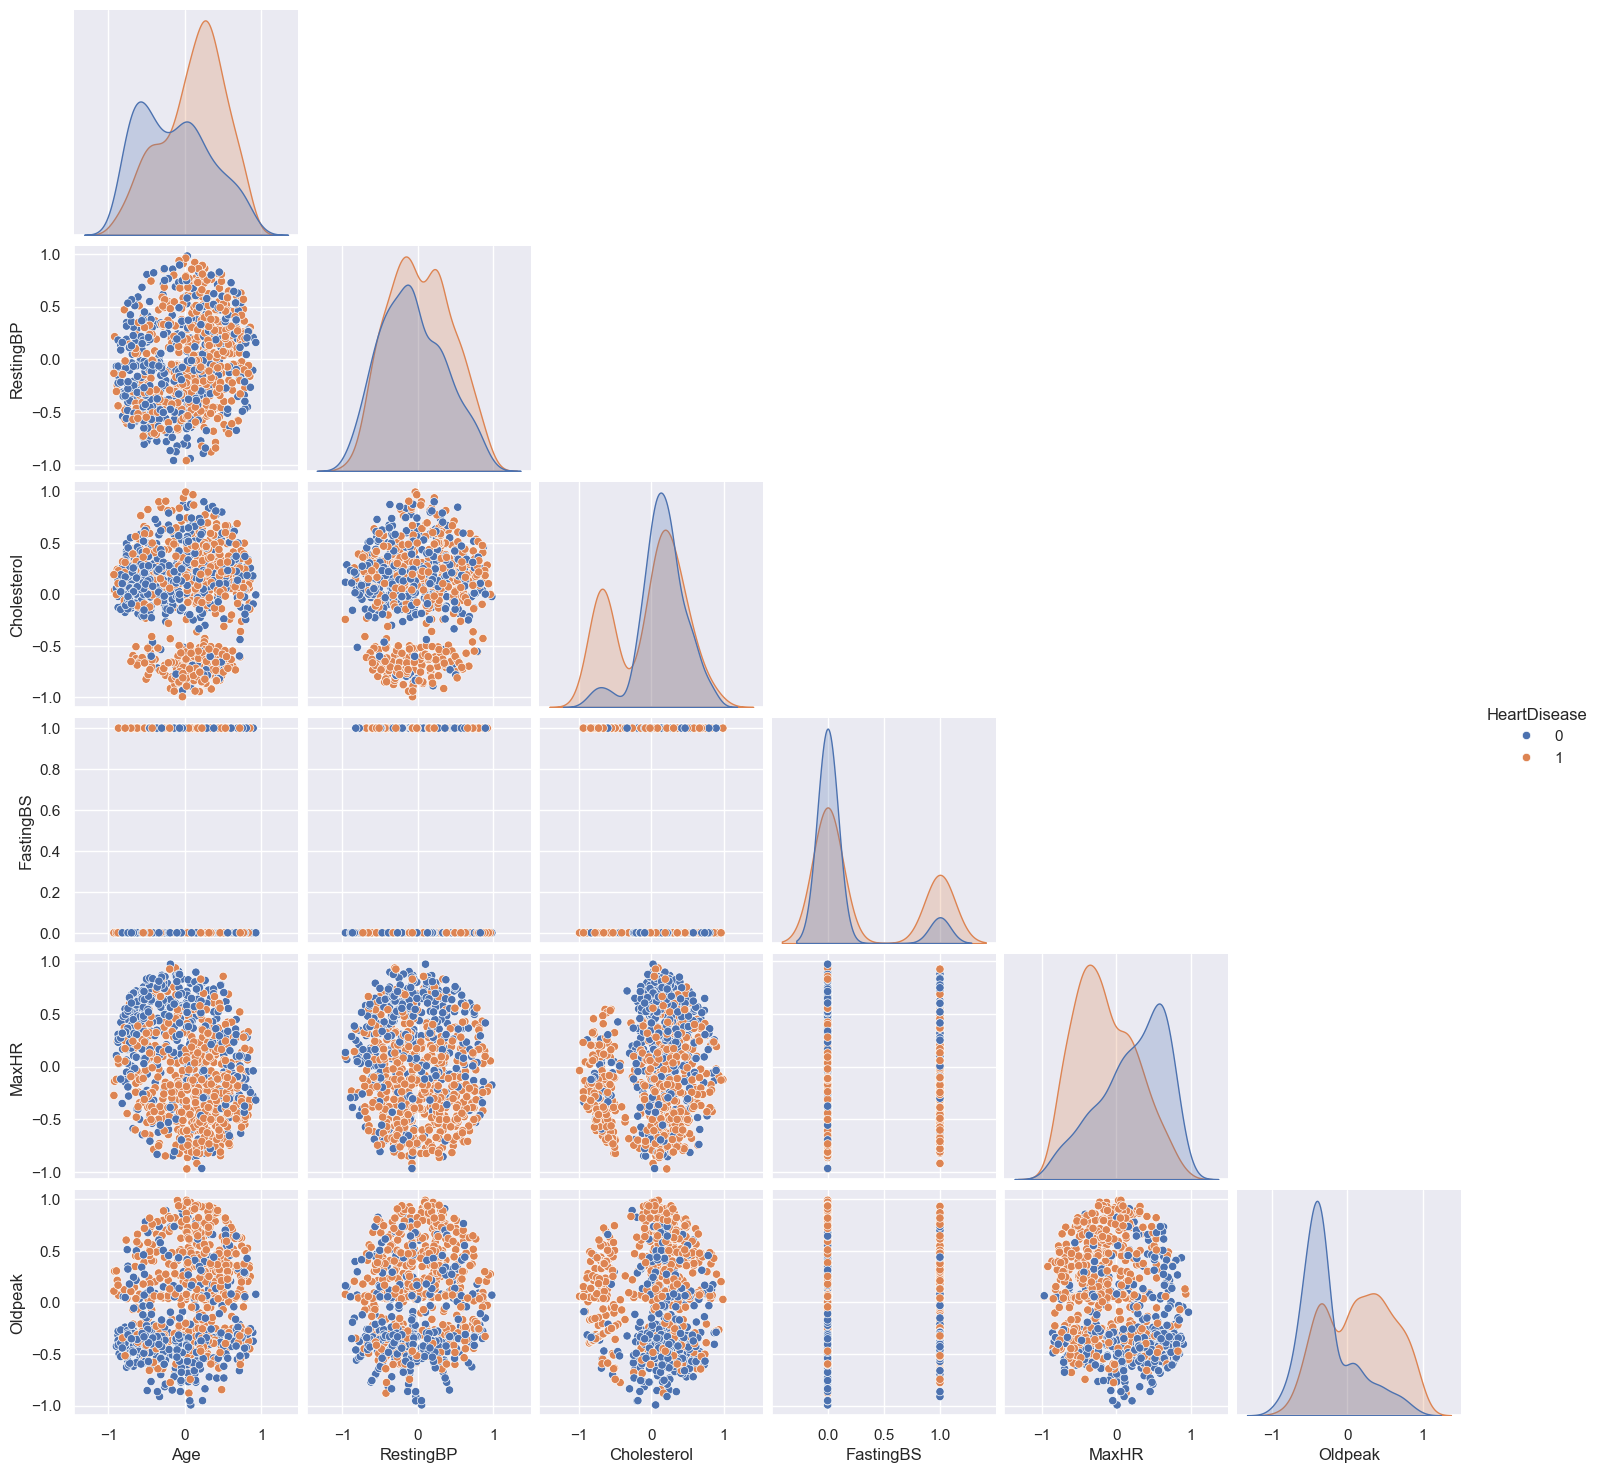

In [15]:
sns.pairplot(
    df,
    corner=True,
    hue="HeartDisease",

);

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'Oldpeak'}>, <Axes: >]], dtype=object)

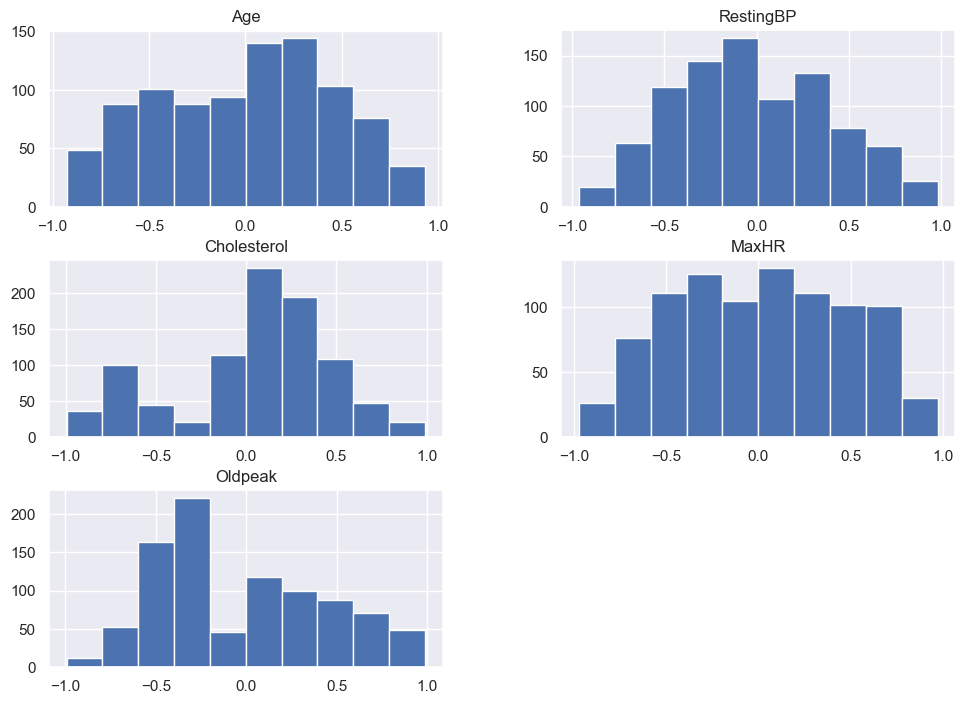

In [16]:
df[num_features].hist()

Now features are less interpretive. However, now they are on the same scale and differences of feature distribution between target classes is more pronounced. 

Having scaled features is crucial, so that ML algorithm wouldn't be biased to one feature with greater values. To convert feature to interpretable format one can always apply inverse transform.

## Categorical feature encoding

In [17]:
features_to_encode = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

I use ```drop_first``` argument to avoid linearly dependent columns that would make problems with fitting some ML algorithms

In [18]:
df = pd.get_dummies(df, columns=features_to_encode, drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-0.610598,0.175070,0.351526,0,0.589205,-0.354663,0,True,True,False,False,True,False,False,False,True
1,-0.273363,0.852255,-0.098243,0,0.430858,0.060367,1,False,False,True,False,True,False,False,True,False
2,-0.676800,-0.050049,0.297634,0,-0.589379,-0.321688,0,True,True,False,False,False,True,False,False,True
3,-0.406805,0.210742,0.096761,0,-0.787891,0.399954,1,False,False,False,False,True,False,True,True,False
4,0.037243,0.682914,-0.024949,0,-0.417776,-0.597563,0,True,False,True,False,True,False,False,False,True


One can also not use feature encoding if ML algorithm of interest accepts categorical values, e.g. CatBoost.

## Conclusions

The dataset doesn't contain crucial outliers and missing variables, so preprocessing in this case could harm the performance of ML model more than improve it. However, the dataset contains features that have different scales and it is important to prepare it prior to fitting ML algorithm.